Connection length plots (Wendelstein 7-X)
================================

This example shows how to create connection-length plots for Wendelstein 7-X. First, we need to perform some setup to make sure W7-X data are available.

In [1]:
import fusionsc as fsc
from fusionsc.devices import w7x

In [2]:
fsc.resolve.importOfflineData('../../w7x-op21.fsc')

Now we need to setup the geometry and magnetic field configuration.

In [3]:
field = w7x.standard()
geometry = w7x.op21Geometry()

grid = w7x.defaultGrid()

Now, we need to define the points on which we want to calculate the connection length

In [4]:
import numpy as np
rRange = np.linspace(6.0, 6.5, 40)
zRange = np.linspace(-0.3, -0.1, 40)

rStart, zStart = np.meshgrid(rRange, zRange, indexing = 'ij')
phi = np.radians(200.8)

xStart = np.cos(phi) * rStart
yStart = np.sin(phi) * rStart
startPoints = [xStart, yStart, zStart]

Before running the calculation, I would like to show a little trick that is good for speedups. In the Poincare example, we passed the grids directly to the trace function, so that it computes fields and indexed geometries by itself. If we trace repeatedly, this is inefficient. So this time, we will ahead of time request the computation and reference its result.

In [5]:
field = field.compute(grid)
geometry = geometry.index(w7x.defaultGeometryGrid())

Now it's time to run our calculation. Since we already computed field and geometry, the grids are no longer required. For connection length plots, we simply limit the number of collisions to 1 and inspect the field line length. We use the error-based adaptive step size.

In [17]:
conLength = fsc.flt.connectionLength(
    startPoints, field, geometry,
    distanceLimit = 3e2,
    
    targetError = 1e-3, maxStepSize = 0.1,
)

In [18]:
# Shape is startsPoints.shape[1:]
conLength.shape

(40, 40)

(-0.5, 0.0)

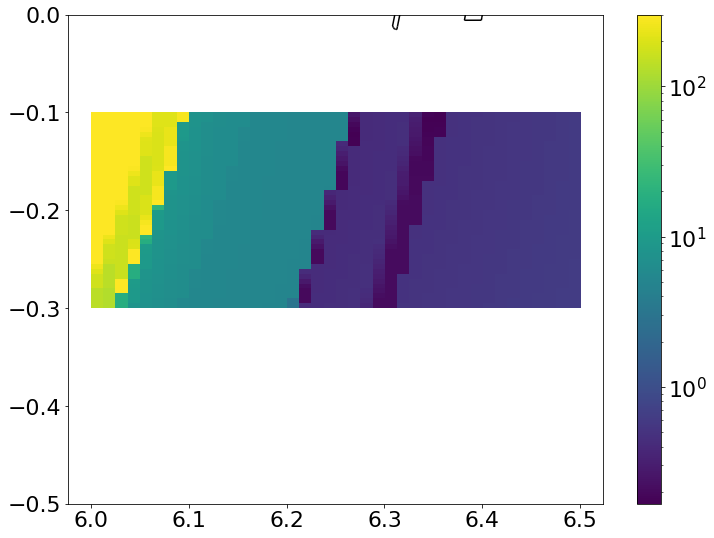

In [19]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize = (12, 9))
plt.imshow(conLength.T, origin = 'lower', extent = [rRange[0], rRange[-1], zRange[0], zRange[-1]], norm = matplotlib.colors.LogNorm())
plt.colorbar()
geometry.plotCut(phi, edgecolors = 'k')
plt.axis('equal')
plt.xlim(6.0, 6.5)
plt.ylim(-0.5, 0)